<a href="https://www.kaggle.com/code/allasamoilenko/data-analysis-crime-samoilenko?scriptVersionId=235107059" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from warnings import filterwarnings
filterwarnings('ignore')

In [156]:
def load_and_analyze_data(filepath):
    df = pd.read_csv(filepath)
    df.info()
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    print("\n=== Числові ознаки ===")
    print(numeric_cols)
    print("\n=== Категоріальні ознаки ===")
    print(categorical_cols)
    
    print("\n=== Пропущені значення ===")
    print(df.isnull().sum())
    
    return df, numeric_cols, categorical_cols

In [157]:
df, numeric_cols, categorical_cols = load_and_analyze_data('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr


Аналіз Latitude:
- Викиди: так
- Кількість піків: 3
- Зміщення: вліво (коефіцієнт асиметрії: -15.85)
- 25% даних: до 34.01
- 50% даних: до 34.06
- 75% даних: до 34.17
- Викиди: 0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998     True
19999    False
Name: Latitude, Length: 20000, dtype: bool спостережень


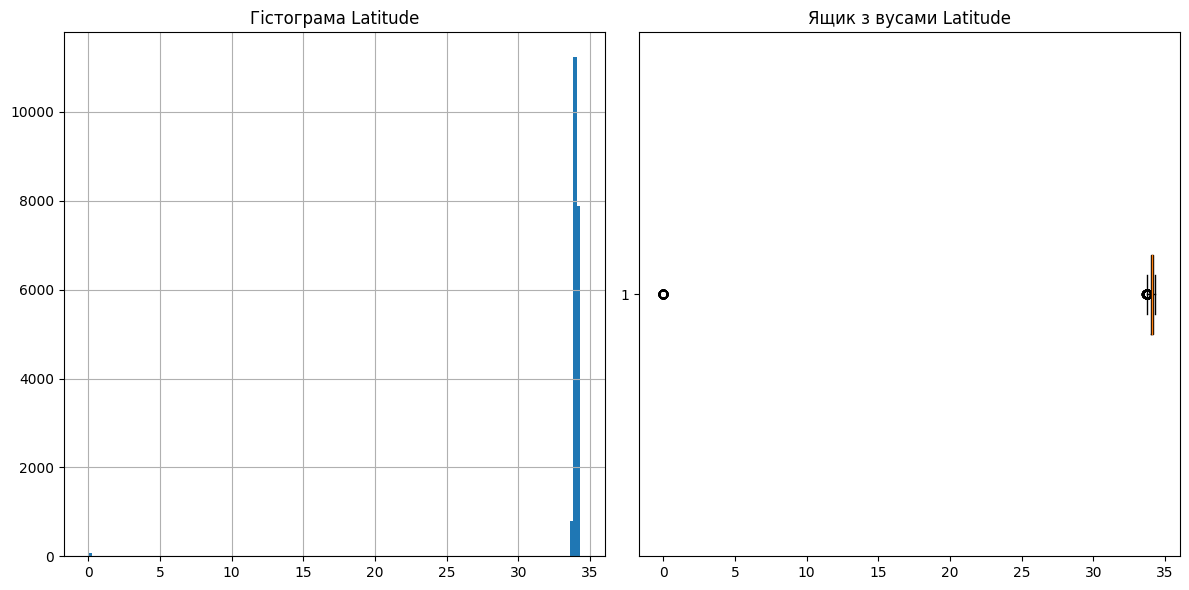


Аналіз Longitude:
- Викиди: так
- Кількість піків: 3
- Зміщення: вправо (коефіцієнт асиметрії: 15.92)
- 25% даних: до -118.43
- 50% даних: до -118.32
- 75% даних: до -118.27
- Викиди: 0        True
1        True
2        True
3        True
4        True
         ... 
19995    True
19996    True
19997    True
19998    True
19999    True
Name: Longitude, Length: 20000, dtype: bool спостережень


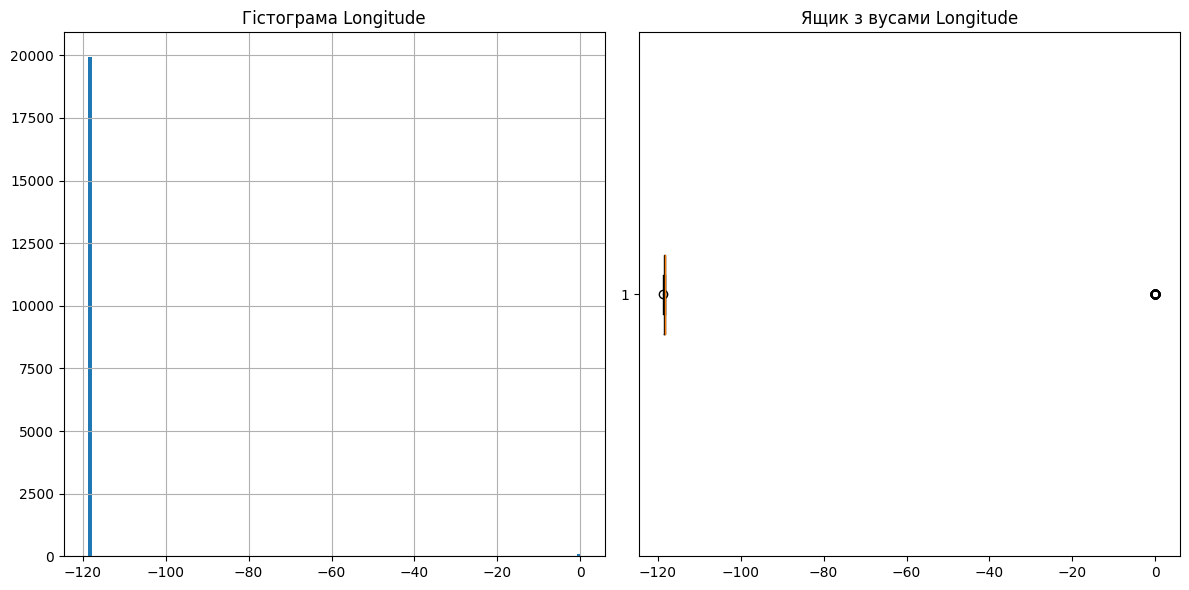


Аналіз Time_Occurred:
- Викиди: ні
- Кількість піків: 3
- Зміщення: вліво (коефіцієнт асиметрії: -0.47)
- 25% даних: до 930.00
- 50% даних: до 1430.00
- 75% даних: до 1900.00
- Викиди: 0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Name: Time_Occurred, Length: 20000, dtype: bool спостережень


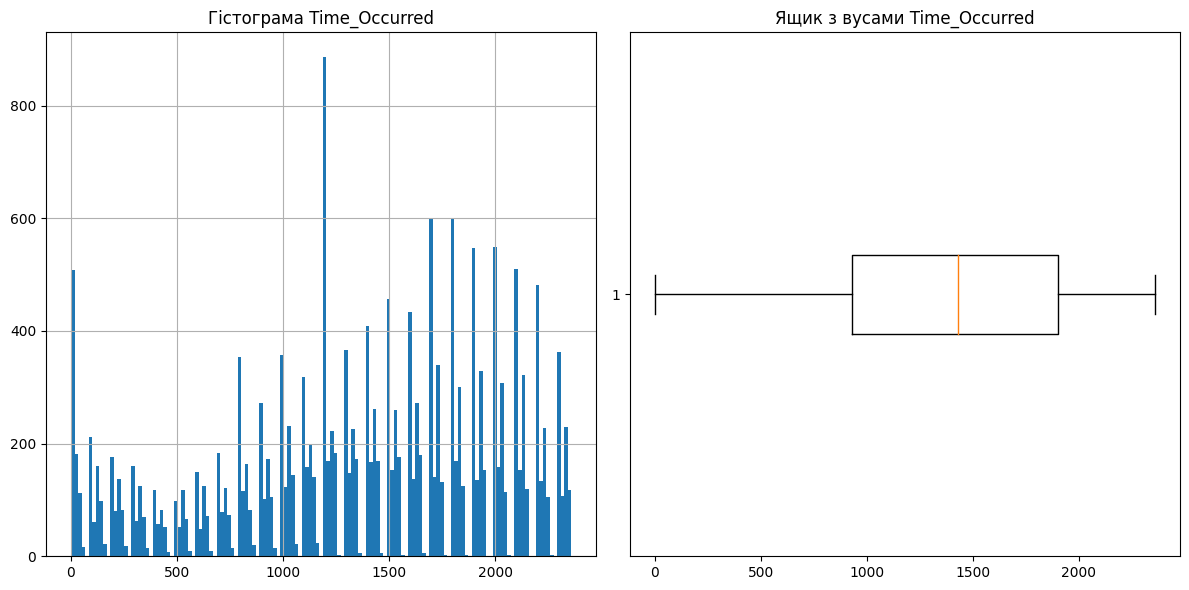


Аналіз Area_ID:
- Викиди: ні
- Кількість піків: 3
- Зміщення: вліво (коефіцієнт асиметрії: -0.01)
- 25% даних: до 6.00
- 50% даних: до 11.00
- 75% даних: до 16.00
- Викиди: 0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Name: Area_ID, Length: 20000, dtype: bool спостережень


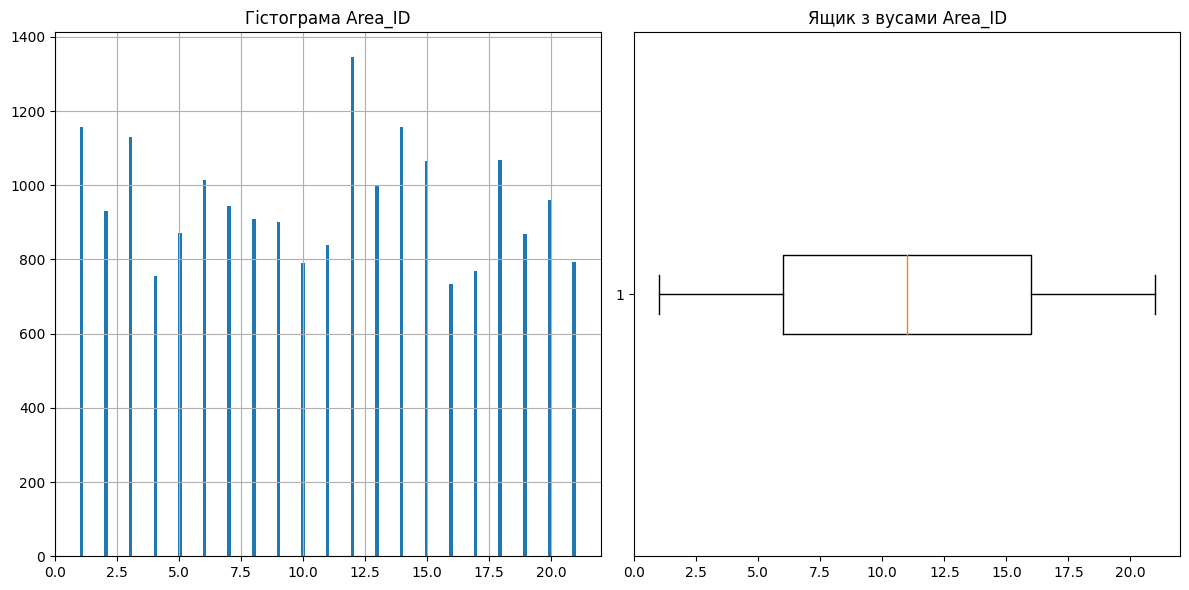


Аналіз Reporting_District_no:
- Викиди: ні
- Кількість піків: 3
- Зміщення: вліво (коефіцієнт асиметрії: -0.00)
- 25% даних: до 632.00
- 50% даних: до 1162.00
- 75% даних: до 1622.00
- Викиди: 0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Name: Reporting_District_no, Length: 20000, dtype: bool спостережень


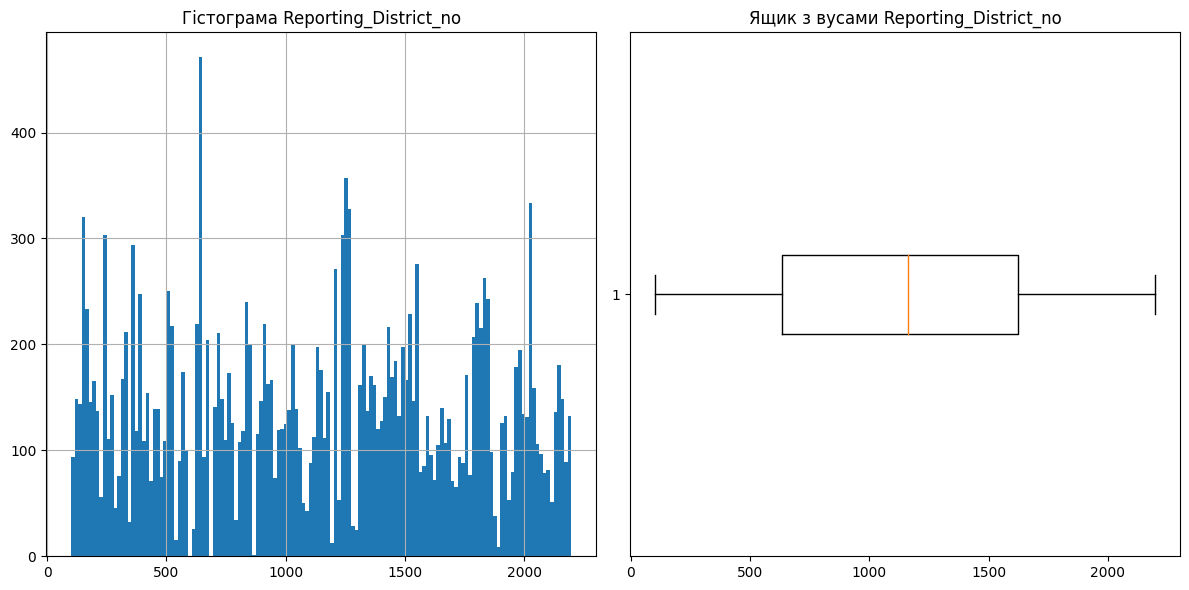


Аналіз Part 1-2:
- Викиди: ні
- Кількість піків: 3
- Зміщення: вправо (коефіцієнт асиметрії: 0.33)
- 25% даних: до 1.00
- 50% даних: до 1.00
- 75% даних: до 2.00
- Викиди: 0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Name: Part 1-2, Length: 20000, dtype: bool спостережень


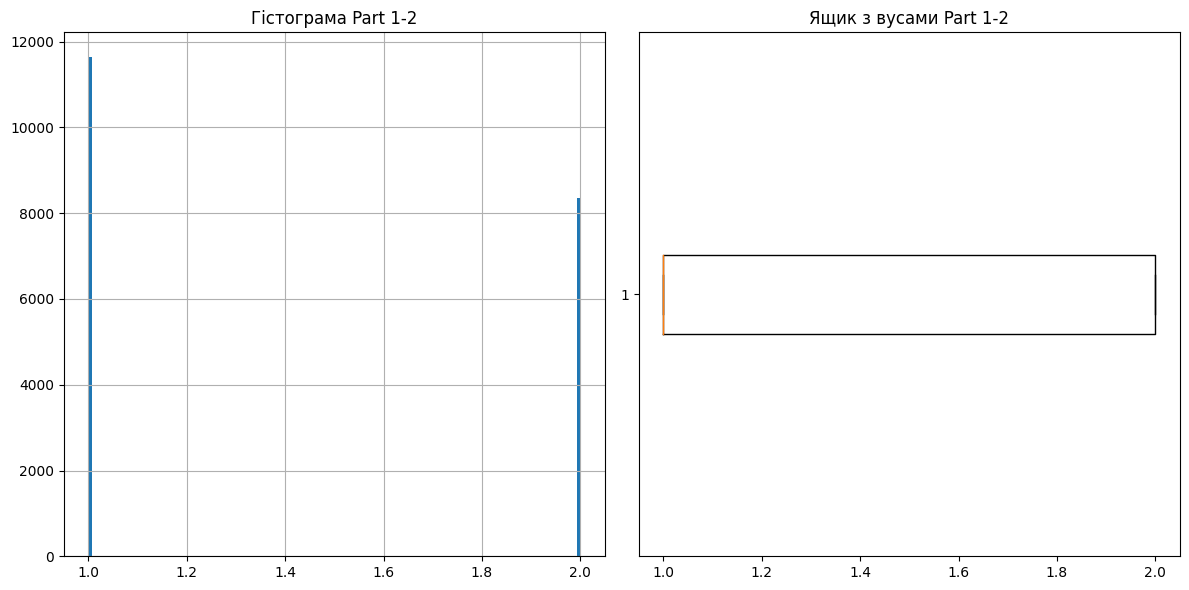


Аналіз Victim_Age:
- Викиди: так
- Кількість піків: 3
- Зміщення: вправо (коефіцієнт асиметрії: 0.11)
- 25% даних: до 12.00
- 50% даних: до 31.00
- 75% даних: до 46.00
- Викиди: 0        True
1        True
2        True
3        True
4        True
         ... 
19995    True
19996    True
19997    True
19998    True
19999    True
Name: Victim_Age, Length: 20000, dtype: bool спостережень


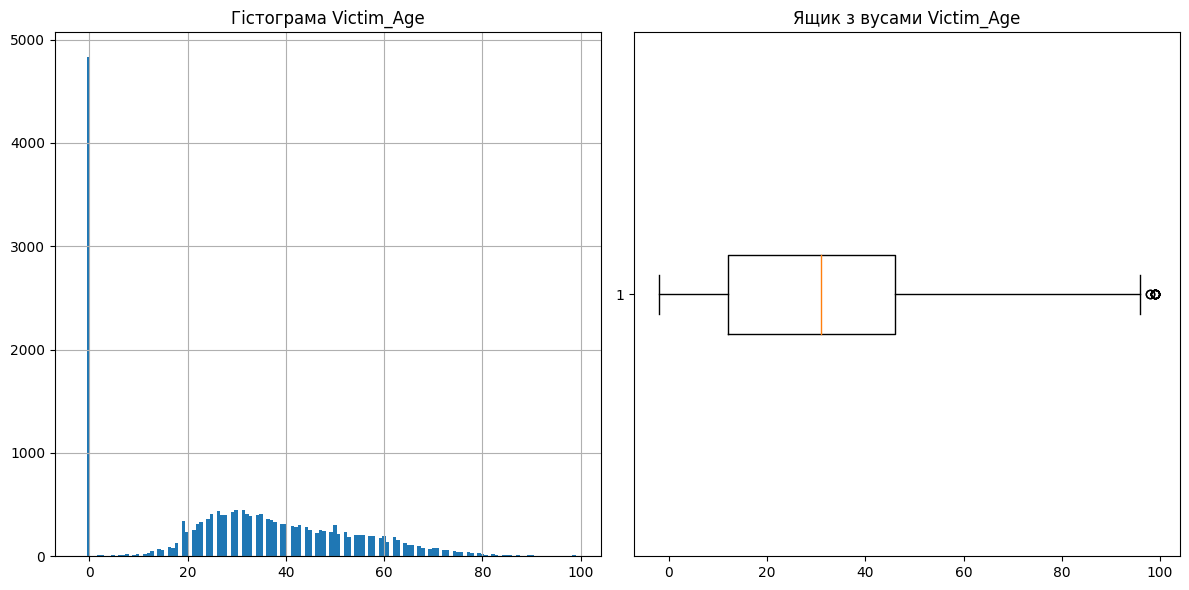


Аналіз Premise_Code:
- Викиди: так
- Кількість піків: 3
- Зміщення: вправо (коефіцієнт асиметрії: 0.54)
- 25% даних: до 101.00
- 50% даних: до 203.00
- 75% даних: до 501.00
- Викиди: 0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Name: Premise_Code, Length: 20000, dtype: bool спостережень


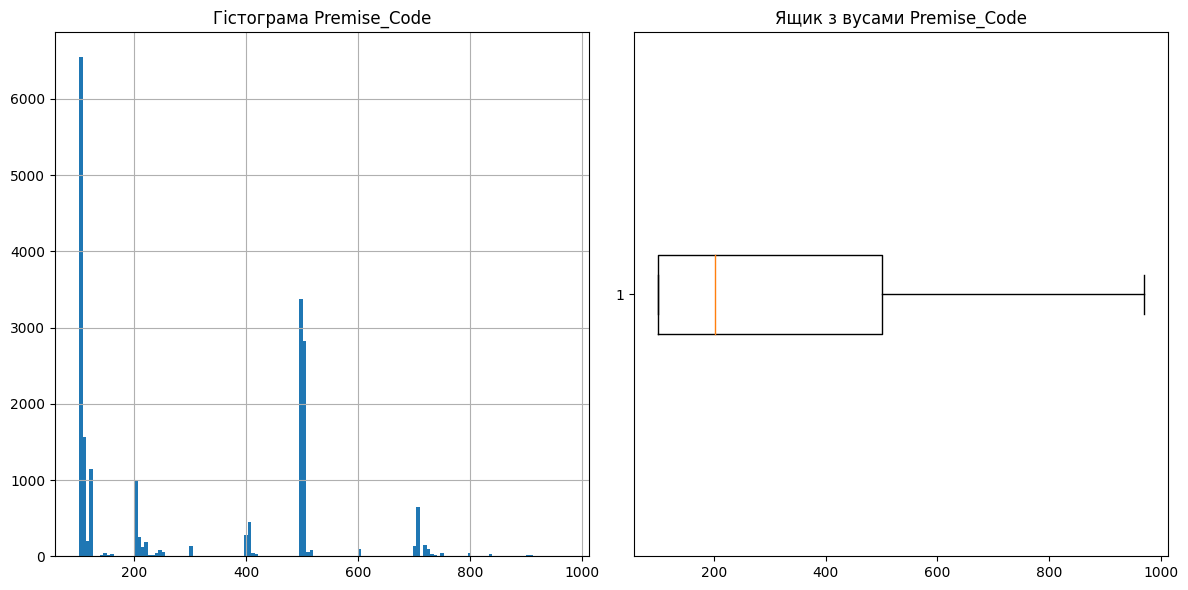


Аналіз Weapon_Used_Code:
- Викиди: ні
- Кількість піків: 3
- Зміщення: вліво (коефіцієнт асиметрії: -1.03)
- 25% даних: до 312.00
- 50% даних: до 400.00
- 75% даних: до 400.00
- Викиди: 0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Name: Weapon_Used_Code, Length: 20000, dtype: bool спостережень


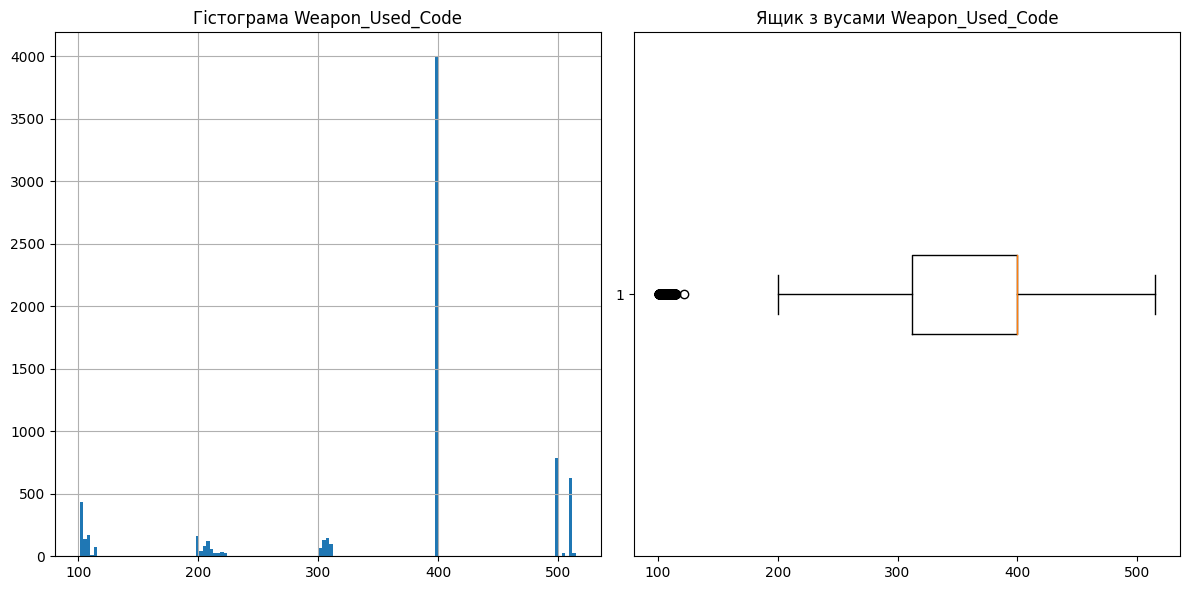

In [159]:
def plot_numeric_features(df, numeric_cols):
    n_cols = int(sqrt(len(df)))
    for col in numeric_cols:
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        df[col].hist(bins=n_cols)
        plt.title(f'Гістограма {col}')
        
        skewness = df[col].skew()
        peaks = len(pd.cut(df[col], bins=n_cols).value_counts().nlargest(3))
        print(f"\nАналіз {col}:")
        print(f"- Викиди: {'так' if len(df[col][(df[col] - df[col].mean()).abs() > 3*df[col].std()]) > 0 else 'ні'}")
        print(f"- Кількість піків: {peaks}")
        print(f"- Зміщення: {'вліво' if skewness < 0 else 'вправо'} (коефіцієнт асиметрії: {skewness:.2f})")
        
        plt.subplot(1, 2, 2)
        plt.boxplot(df[col].dropna(), vert=False)
        plt.title(f'Ящик з вусами {col}')
        
        q1, q2, q3 = df[col].quantile([0.25, 0.5, 0.75])
        iqr = q3 - q1
        outliers = ((df[col] < (q1 - 1.5*iqr))) | ((df[col] > (q3 + 1.5*iqr))).sum()
        print(f"- 25% даних: до {q1:.2f}")
        print(f"- 50% даних: до {q2:.2f}")
        print(f"- 75% даних: до {q3:.2f}")
        print(f"- Викиди: {outliers} спостережень")
        
        plt.tight_layout()
        plt.show()

plot_numeric_features(df, numeric_cols)

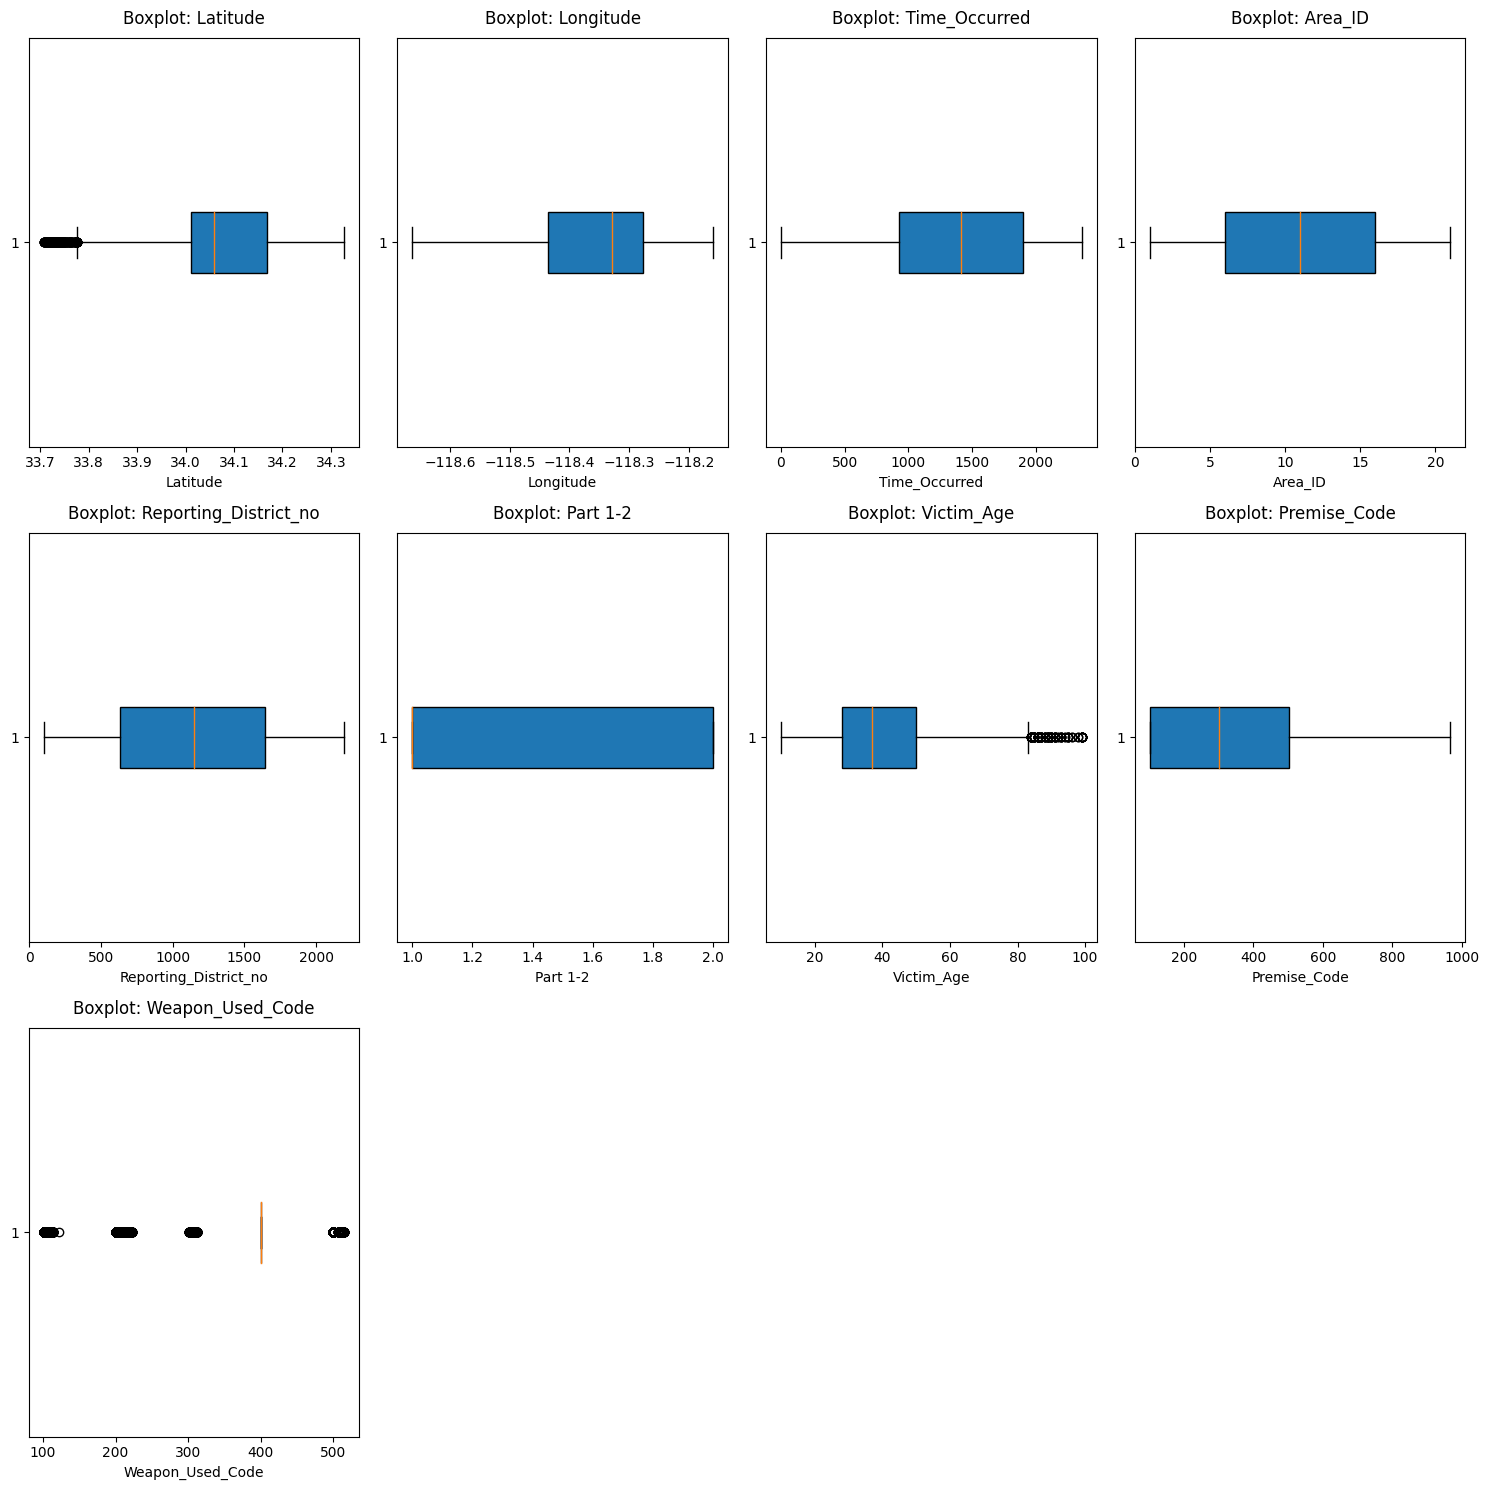


=== Статистика після обробки викидів ===
           Latitude     Longitude  Time_Occurred       Area_ID  \
count  15002.000000  15002.000000   15002.000000  15002.000000   
mean      34.075417   -118.357931    1347.180309     10.843421   
std        0.112490      0.104554     641.061643      6.100514   
min       33.707000   -118.663400       1.000000      1.000000   
25%       34.011100   -118.435200     930.000000      6.000000   
50%       34.059700   -118.328800    1415.000000     11.000000   
75%       34.167300   -118.277200    1900.000000     16.000000   
max       34.328100   -118.159300    2359.000000     21.000000   

       Reporting_District_no      Part 1-2    Victim_Age  Premise_Code  \
count           15002.000000  15002.000000  15002.000000  15002.000000   
mean             1130.487602      1.484269     39.978136    323.952673   
std               609.835094      0.499769     15.573581    212.805423   
min               101.000000      1.000000     10.000000    101.000

In [163]:
# 3. Індивідуальна обробка викидів
def custom_outlier_handling(df):
    df_clean = df.copy()
    
    # Обробка Latitude - фільтрація значень < 30
    df_clean = df_clean[df_clean['Latitude'] >= 30]
    
    # Обробка Victim_Age - фільтрація значень поза діапазоном [10, 100]
    df_clean = df_clean[(df_clean['Victim_Age'] >= 10) & (df_clean['Victim_Age'] <= 100)]
    
    # Отримуємо список числових стовпців
    numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Визначаємо оптимальну кількість рядків і стовпців для subplot
    n_cols = 4  # Фіксована кількість стовпців
    n_rows = len(numeric_cols) // n_cols + (1 if len(numeric_cols) % n_cols != 0 else 0)
    
    # Візуалізація після обробки викидів
    plt.figure(figsize=(15, 5*n_rows))  # Динамічний розмір залежно від кількості рядків
    
    for i, column in enumerate(numeric_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        plt.boxplot(df_clean[column].dropna(), vert=False, patch_artist=True)
        plt.title(f'Boxplot: {column}', pad=10)
        plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()
    
    return df_clean

# Застосування індивідуальної обробки викидів
df_clean = custom_outlier_handling(df)

# Перевірка результатів
print("\n=== Статистика після обробки викидів ===")
numb_columns = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(df_clean[numb_columns].describe())

# Порівняння розмірів датафреймів
print(f"\nРозмір оригінального датафрейму: {df.shape}")
print(f"Розмір очищеного датафрейму: {df_clean.shape}")
print(f"Видалено записів: {df.shape[0] - df_clean.shape[0]} ({((df.shape[0] - df_clean.shape[0])/df.shape[0])*100:.2f}%)")

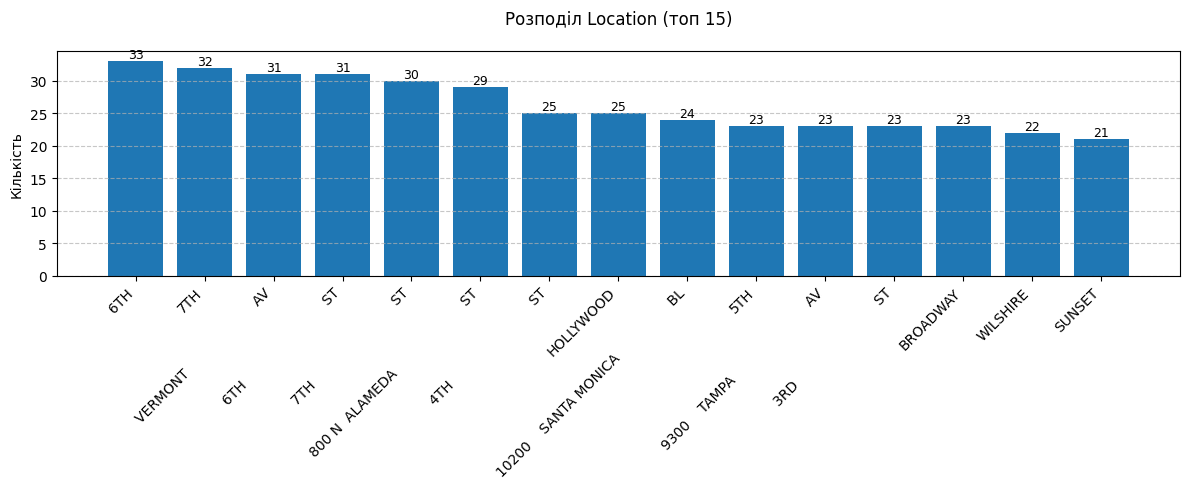

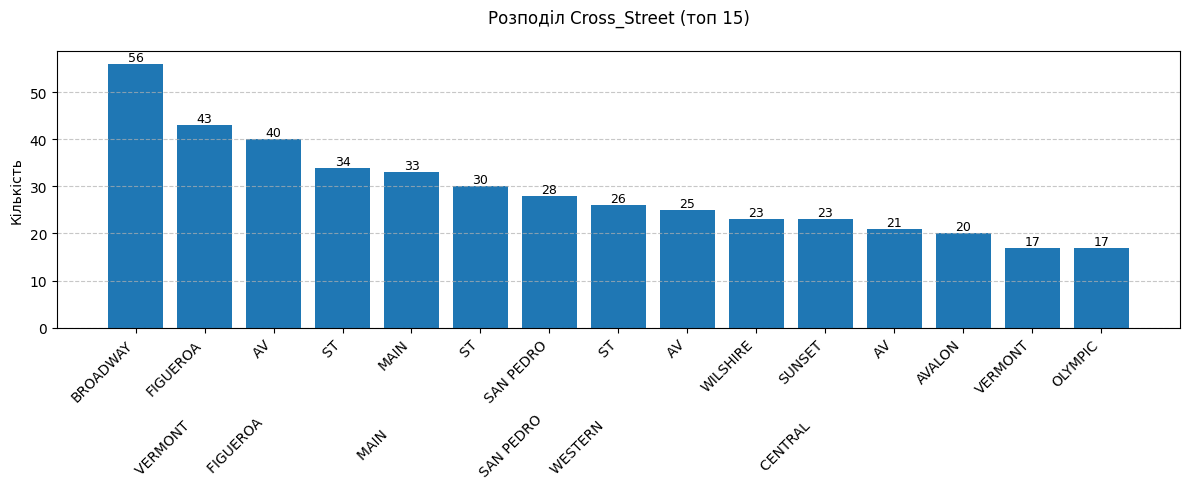

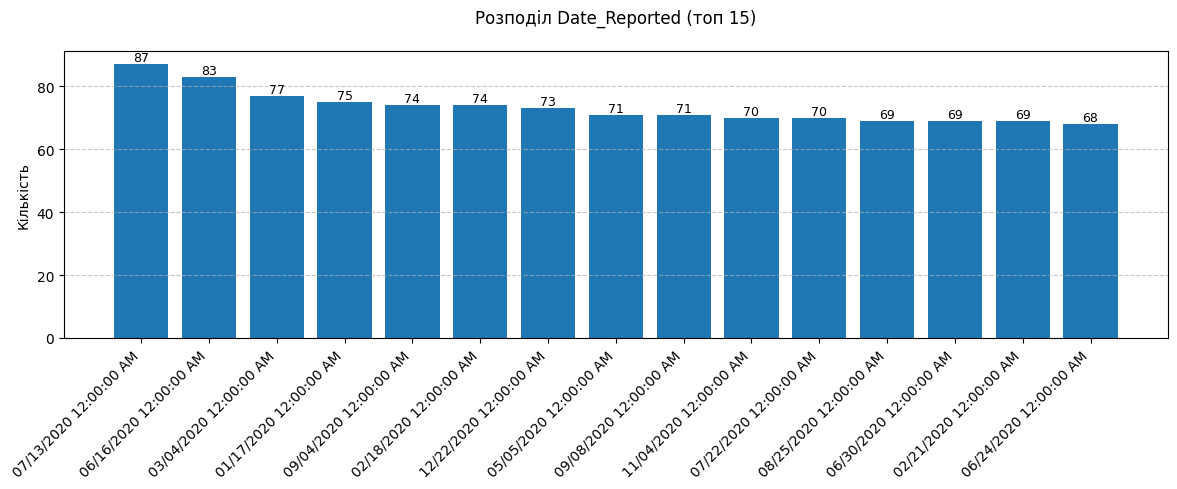

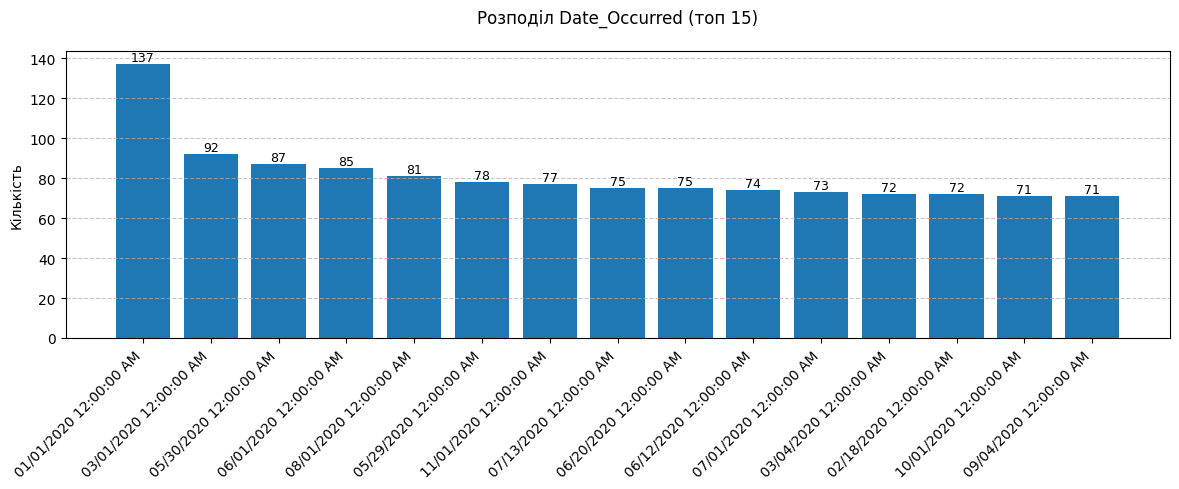

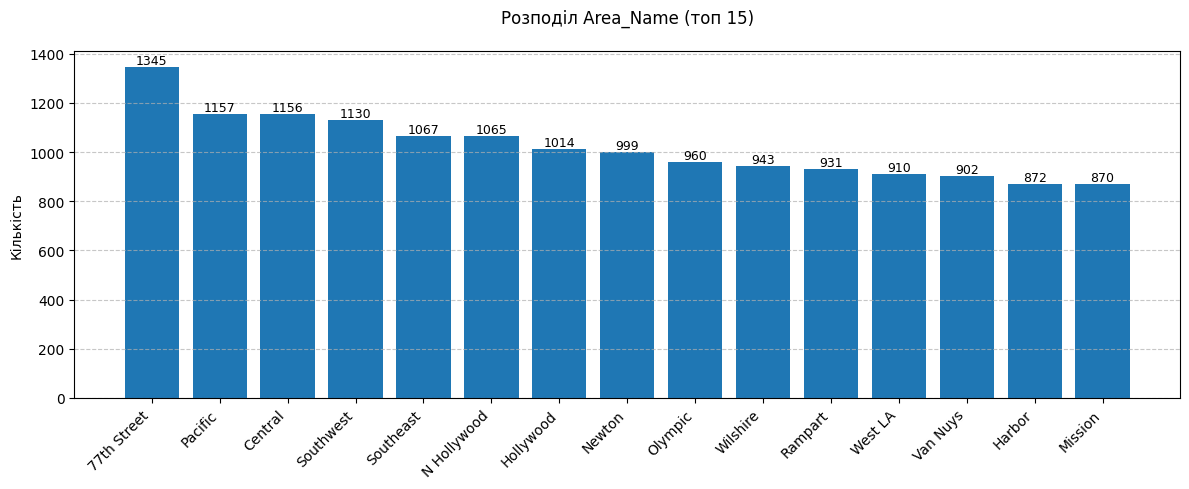

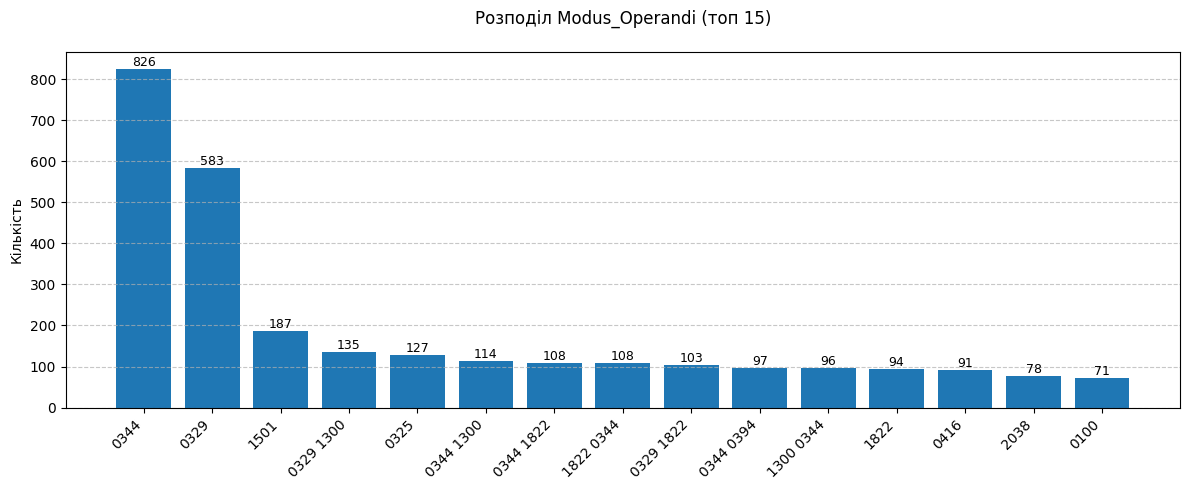

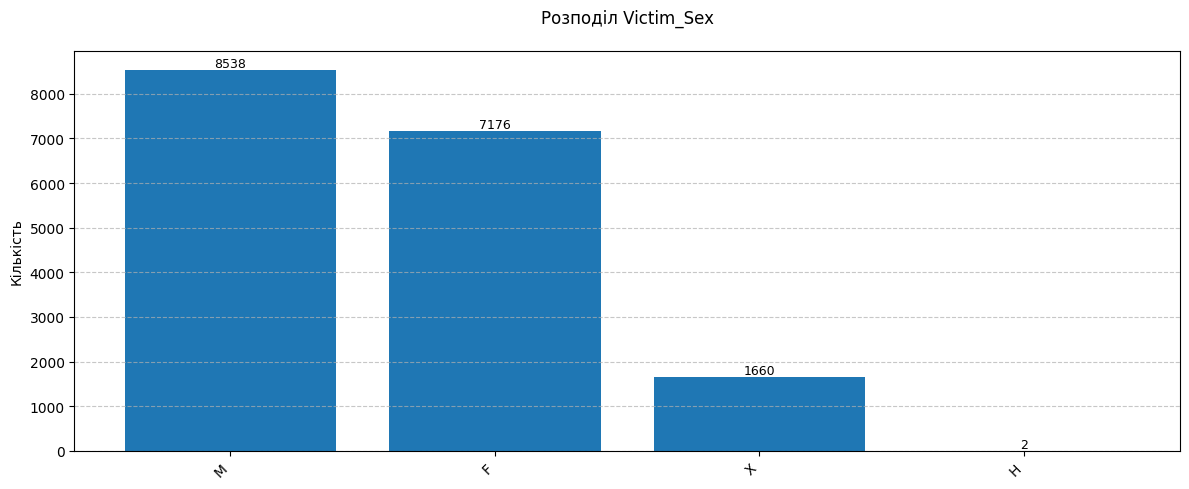

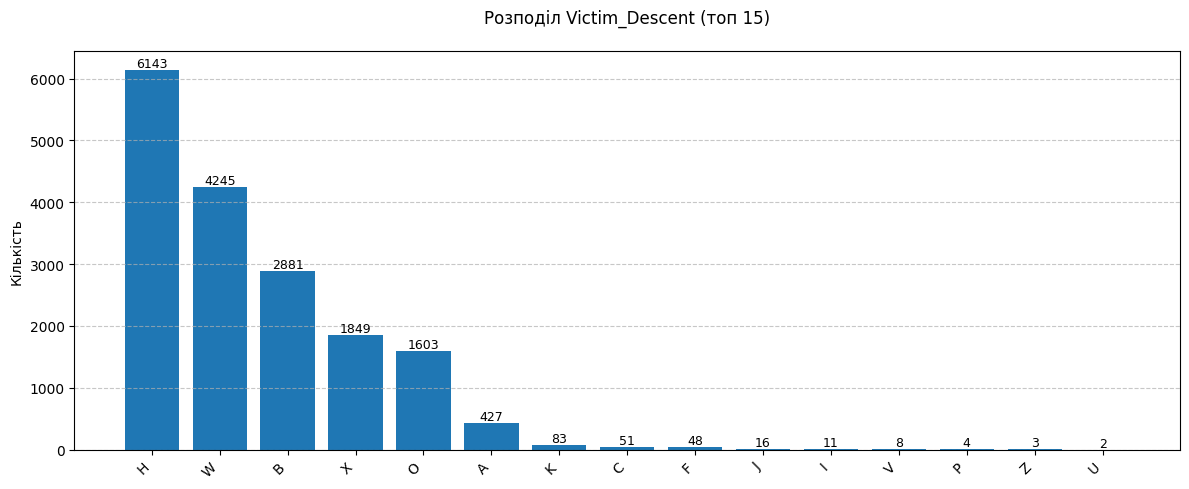

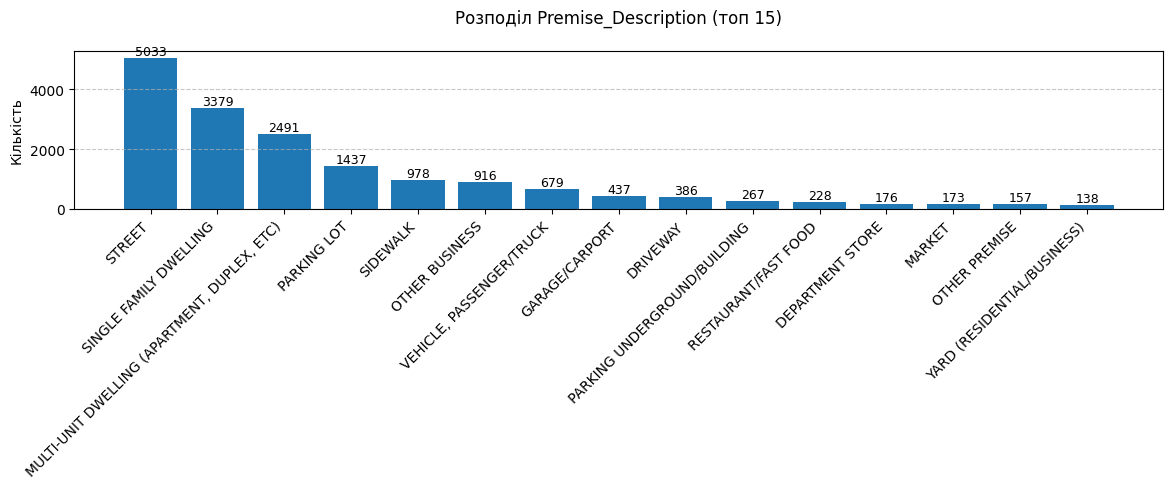

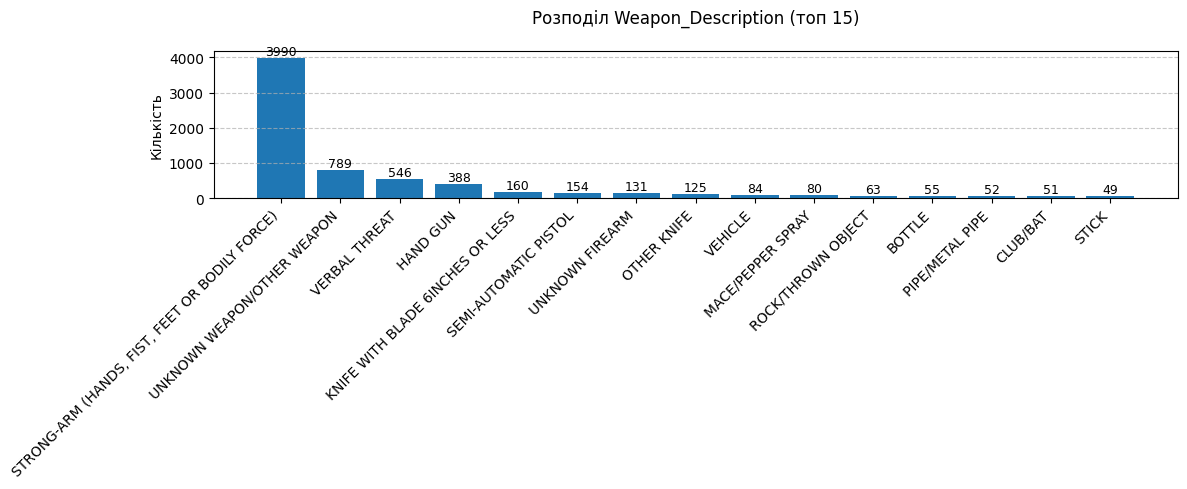

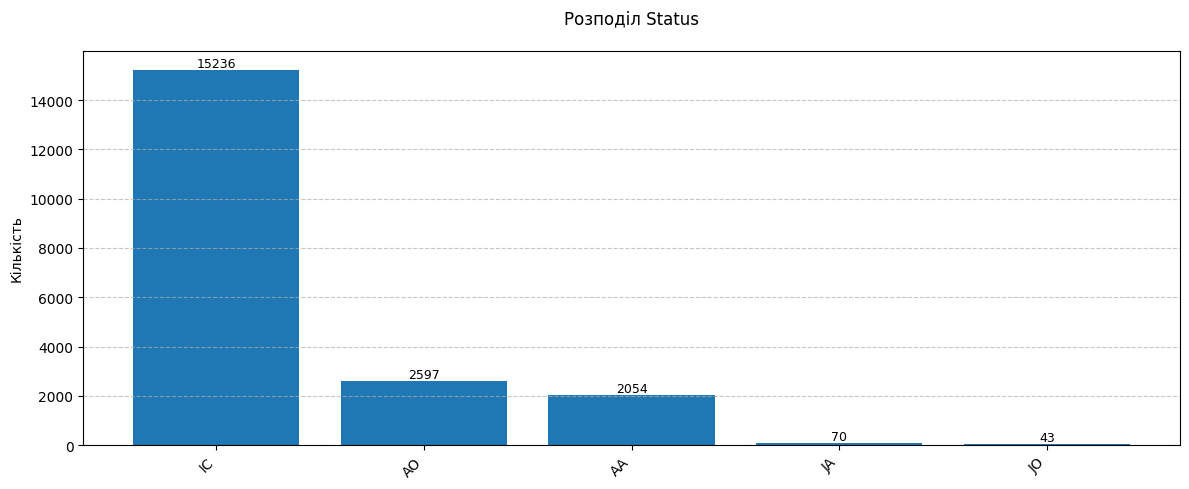

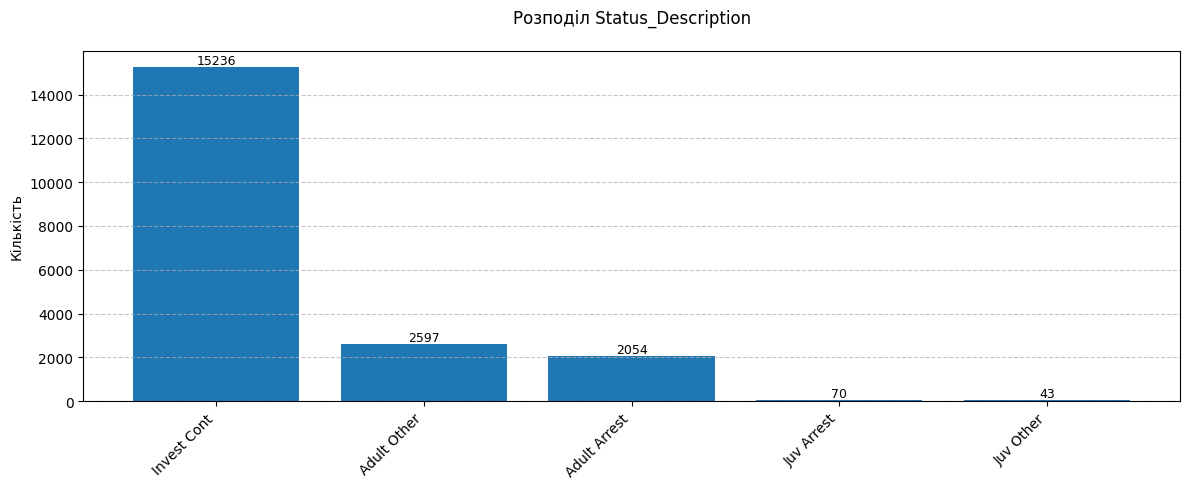

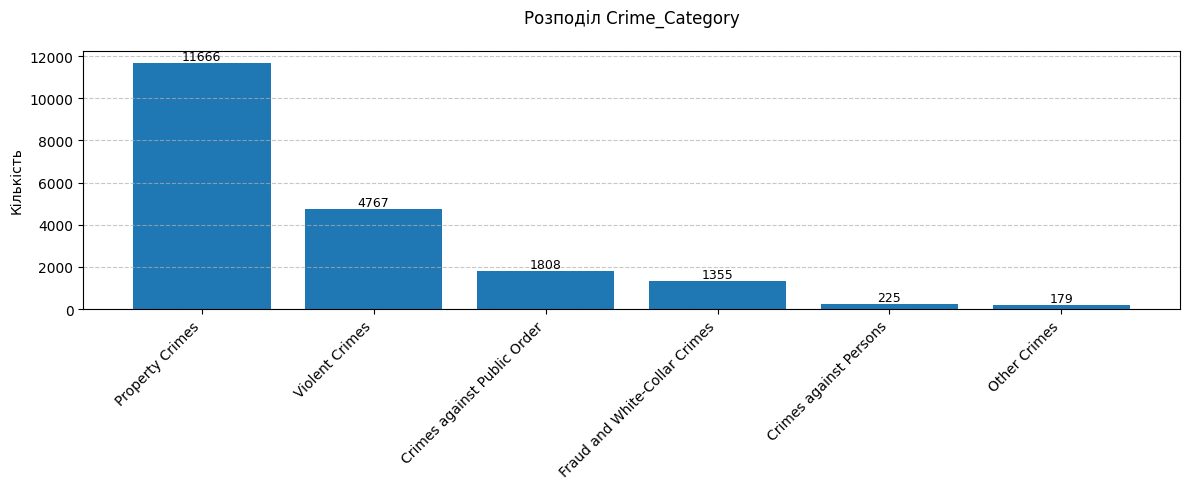

In [165]:
def plot_categorical_features(df, categorical_cols, max_categories=15):
    for col in categorical_cols:
        # Отримуємо топ max_categories категорій
        value_counts = df[col].value_counts()
        
        # Якщо категорій забагато - обмежуємо кількість
        if len(value_counts) > max_categories:
            value_counts = value_counts[:max_categories]
            title_suffix = f" (топ {max_categories})"
        else:
            title_suffix = ""
        
        plt.figure(figsize=(12, 5))
        
        # Спрощений barplot
        bars = plt.bar(value_counts.index.astype(str), value_counts.values)
        
        # Додаємо значення на стовпці
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom', fontsize=9)
        
        plt.title(f'Розподіл {col}{title_suffix}', pad=20)
        plt.xlabel('')
        plt.ylabel('Кількість')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

# Виклик функції
plot_categorical_features(df, categorical_cols)

<Figure size 1200x600 with 0 Axes>

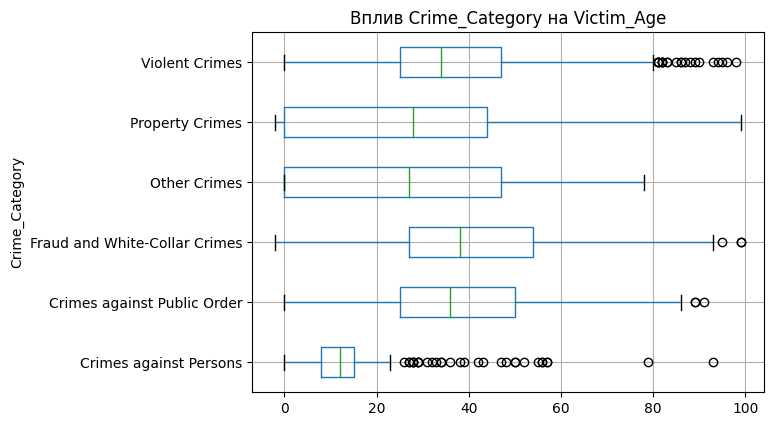

In [166]:
def plot_group_analysis(df, numeric_col, categorical_col):
    plt.figure(figsize=(12, 6))
    df.boxplot(column=numeric_col, by=categorical_col, vert=False)
    plt.title(f'Вплив {categorical_col} на {numeric_col}')
    plt.suptitle('')
    plt.show()

plot_group_analysis(df, 'Victim_Age', 'Crime_Category')

Кореляція між Latitude та Longitude: -1.00


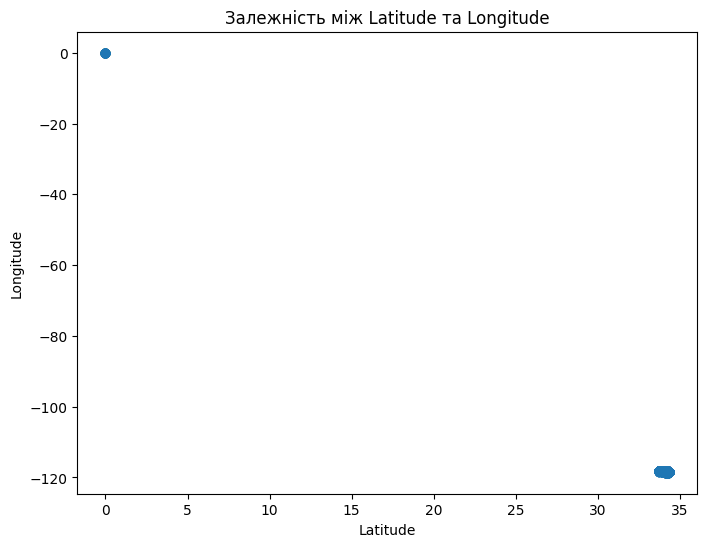

Кореляція між Latitude та Time_Occurred: 0.01


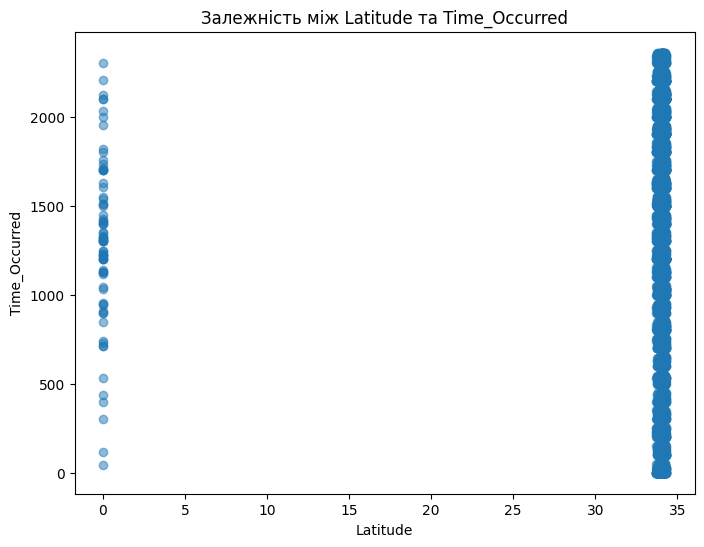

Кореляція між Latitude та Area_ID: 0.02


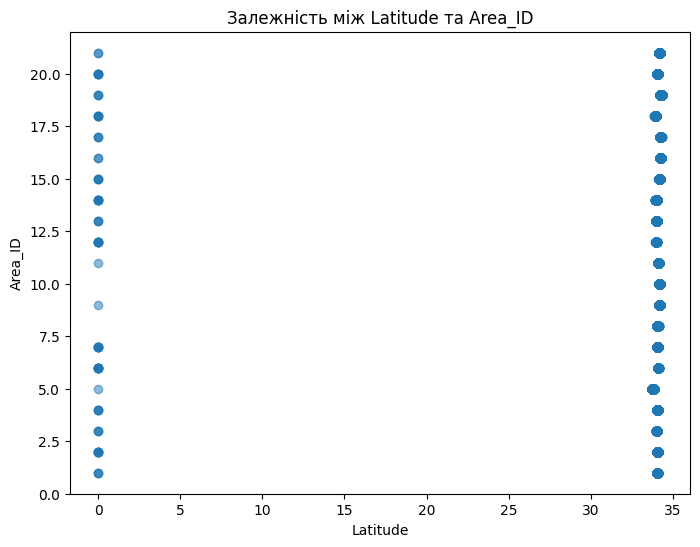

Кореляція між Longitude та Time_Occurred: -0.01


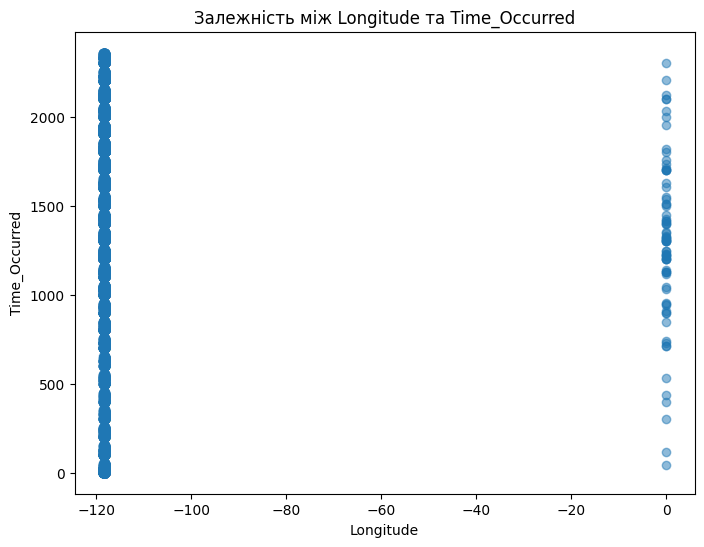

Кореляція між Longitude та Area_ID: -0.01


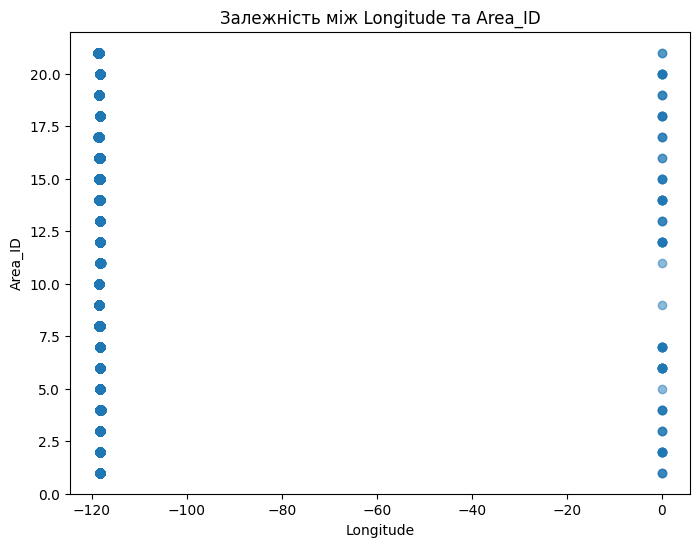

Кореляція між Time_Occurred та Area_ID: 0.01


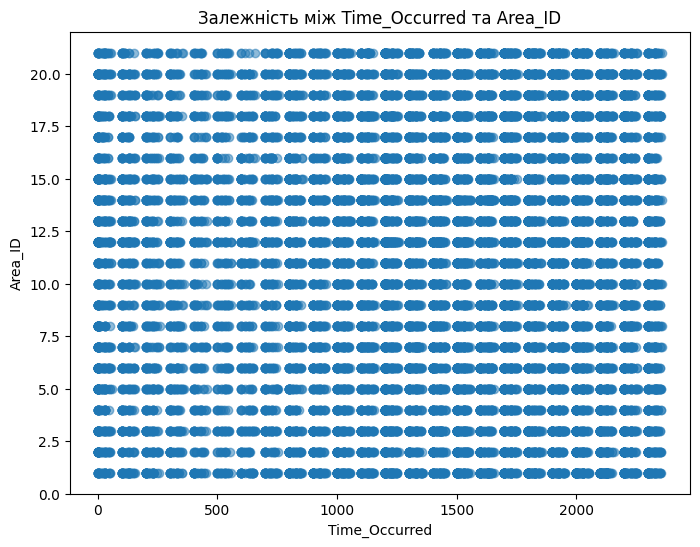

In [167]:
from itertools import combinations
def plot_scatter_matrix(df, numeric_cols):
    for col1, col2 in combinations(numeric_cols, 2):
        plt.figure(figsize=(8, 6))
        plt.scatter(df[col1], df[col2], alpha=0.5)
        plt.title(f'Залежність між {col1} та {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        
        # Розрахунок кореляції
        corr = df[[col1, col2]].corr().iloc[0,1]
        print(f"Кореляція між {col1} та {col2}: {corr:.2f}")
        
        plt.show()

plot_scatter_matrix(df, numeric_cols[:4]) 

In [168]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Crime_Category'])
y_clean = label_encoder.transform(df_clean['Crime_Category'])

In [169]:
high_card_cols = ['Location', 'Cross_Street', 'Modus_Operandi']
low_card_cols = ['Area_Name', 'Part 1-2', 'Victim_Sex', 'Victim_Descent',
                'Premise_Description', 'Weapon_Description',
                'Status', 'Status_Description']

In [170]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def frequency_encoder(X):
    if isinstance(X, pd.DataFrame):
        df = X.copy()
    else:
        df = pd.DataFrame(X, columns=high_card_cols)
    
    for col in df.columns:
        freq = df[col].value_counts(normalize=True)
        df[col] = df[col].map(freq)
    return df

In [171]:
high_card_transformer = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy='constant', fill_value='UNKNOWN')),
    ('freq_encoder', FunctionTransformer(frequency_encoder))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='UNKNOWN')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(random_state=42))
])

preprocessor = ColumnTransformer(transformers=[
    ('high_card', high_card_transformer, high_card_cols),
    ('low_card', categorical_transformer, low_card_cols),
    ('num', numerical_transformer, numeric_cols)
])

In [172]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, make_scorer

def objective(trial):
    params = {
        'classifier__n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'classifier__max_depth': trial.suggest_int('max_depth', 3, 10),
        'classifier__learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'classifier__subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'classifier__colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
    }
    
    model = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', XGBClassifier(
            random_state=42,
            eval_metric='mlogloss',
            use_label_encoder=False,
            **params
        ))
    ])
    
    cv_score = cross_val_score(
        model, df_clean.drop('Crime_Category', axis=1), y_clean, 
        cv=5, scoring=make_scorer(f1_score, average='weighted'), n_jobs=-1
    )
    
    return cv_score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)
best_params = study.best_params

[I 2025-04-20 20:38:47,278] A new study created in memory with name: no-name-8cde9d32-75b0-4f91-9a1b-a5f0389ed2b1
[I 2025-04-20 20:39:47,050] Trial 0 finished with value: 0.8384470895655521 and parameters: {'n_estimators': 136, 'max_depth': 5, 'learning_rate': 0.17899771339338866, 'subsample': 0.768162788180782, 'colsample_bytree': 0.8181511549725861}. Best is trial 0 with value: 0.8384470895655521.
[I 2025-04-20 20:40:44,681] Trial 1 finished with value: 0.8384470895655521 and parameters: {'n_estimators': 454, 'max_depth': 9, 'learning_rate': 0.22572847095394855, 'subsample': 0.7476940420802843, 'colsample_bytree': 0.9865740966624406}. Best is trial 0 with value: 0.8384470895655521.
[I 2025-04-20 20:41:41,975] Trial 2 finished with value: 0.8384470895655521 and parameters: {'n_estimators': 474, 'max_depth': 8, 'learning_rate': 0.11569545531811289, 'subsample': 0.8667216694704931, 'colsample_bytree': 0.6858862522286998}. Best is trial 0 with value: 0.8384470895655521.
[I 2025-04-20 20:

In [173]:
final_model = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(
        random_state=42,
        eval_metric='mlogloss',
        use_label_encoder=False,
        **best_params
    ))
])

In [174]:
final_model.fit(df_clean.drop('Crime_Category', axis=1), y_clean)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('high_card',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='UNKNOWN',
                                                                                 strategy='constant')),
                                                                  ('freq_encoder',
                                                                   FunctionTransformer(func=<function frequency_encoder at 0x7e7a52b6e8c0>))]),
                                                  ['Location', 'Cross_Street',
                                                   'Modus_Operandi']),
                                                 ('low_card',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(f...
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.17899771339338866, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=5,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=136,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Crime_Category', axis=1), y, test_size=0.2, random_state=42
)

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    df_clean.drop('Crime_Category', axis=1), y_clean, test_size=0.2, random_state=42
)

In [176]:
model_raw = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(
        random_state=42,
        eval_metric='mlogloss',
        use_label_encoder=False,
        **best_params
    ))
])
model_raw.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('high_card',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='UNKNOWN',
                                                                                 strategy='constant')),
                                                                  ('freq_encoder',
                                                                   FunctionTransformer(func=<function frequency_encoder at 0x7e7a52b6e8c0>))]),
                                                  ['Location', 'Cross_Street',
                                                   'Modus_Operandi']),
                                                 ('low_card',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(f...
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.17899771339338866, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=5,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=136,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [177]:
from sklearn.metrics import classification_report

print("=== Результати на неочищених даних ===")
y_pred_raw = model_raw.predict(X_test)
print(classification_report(y_test, y_pred_raw, target_names=label_encoder.classes_))

print("\n=== Результати на очищених даних ===")
y_pred_clean = final_model.predict(X_test_clean)
print(classification_report(y_test_clean, y_pred_clean, target_names=label_encoder.classes_))

=== Результати на неочищених даних ===
                               precision    recall  f1-score   support

       Crimes against Persons       0.65      0.53      0.59        32
  Crimes against Public Order       0.71      0.57      0.63       374
Fraud and White-Collar Crimes       0.60      0.88      0.71       267
                 Other Crimes       0.11      0.23      0.15        35
              Property Crimes       0.96      0.88      0.92      2303
               Violent Crimes       0.83      0.93      0.88       989

                     accuracy                           0.85      4000
                    macro avg       0.64      0.67      0.65      4000
                 weighted avg       0.87      0.85      0.86      4000


=== Результати на очищених даних ===


ValueError: Feature shape mismatch, expected: 326, got 329

In [ ]:
import joblib
joblib.dump(final_model, 'best_crime_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

In [ ]:
optuna.visualization.plot_optimization_history(study)
optuna.visualization.plot_param_importances(study)